In [32]:
# import warnings
# warnings.simplefilter("ignore")
# import sys
# import nibabel as nib
# import numpy as np
# import nilearn.image as nl
# import os
# import os.path as op
# from PIL import Image

# import matplotlib.pyplot as plt

# def get_sliced_array(img_path):

#     img_nii=nib.load(img_path)

#     img_arr=img_nii.get_data()

#     x,y,z = img_arr.shape

#     image_arr_1 = np.concatenate((img_arr[int(x*0.35),:,:],img_arr[int(x*0.51),:,:],img_arr[int(x*0.65),:,:]),axis=1)

#     image_arr_2 = np.concatenate((img_arr[:,int(y*0.35),:],img_arr[:,int(y*0.51),:],img_arr[:,int(y*0.65),:]),axis=1)

#     image_arr_3 = np.concatenate((img_arr[:,:,int(z*0.35)],img_arr[:,:,int(z*0.51)],img_arr[:,:,int(z*0.65)]),axis=1)

#     image_arr = np.vstack((image_arr_1,image_arr_2,image_arr_3))

#     return image_arr



# def get_overlay_images(img0, img1, img2):

#     # Normalize the input images to [0,255]

#     img0 = 255 * ((img0 - img0.min()) / (img0.max() - img0.min()))

#     img1 = 255 * ((img1 - img1.min()) / (img1.max() - img1.min()))
    
#     img2 = 255 * ((img2 - img2.min()) / (img2.max() - img2.min()))

#     # Create the color images

#     img0_red = np.zeros(shape=(img0.shape) + (3,), dtype=np.uint8)

#     img1_green = np.zeros(shape=(img1.shape) + (3,), dtype=np.uint8)
    
#     img2_blue = np.zeros(shape=(img2.shape) + (3,), dtype=np.uint8)

#     overlay = np.zeros(shape=(img0.shape) + (3,), dtype=np.uint8)

#     # Copy the normalized intensities into the appropriate channels of the

#     # color images

#     img0_red[..., 0] = img0

#     img1_green[..., 1] = img1
    
#     img2_blue[..., 2] = img2

#     overlay[..., 0] = img0*30

#     overlay[..., 1] = img1*40
    
#     overlay[..., 2] = img2*50

#     return overlay

In [37]:
import warnings



warnings.simplefilter("ignore")

import sys

import nibabel as nib

import numpy as np

import nilearn.image as nl

import os

import os.path as op



def get_filename(label):

    """

    Given a fully qualified path gets just the file name, without extension

    """

    return op.splitext(op.splitext(op.basename(label))[0])[0]





def get_true_volume(nparray):

    img_arr = nparray.astype(int)

    threshold = int(1)

    img_arr[img_arr <= threshold] = 0

    img_arr[img_arr > threshold] = 1

    true_volume = np.where(img_arr == 1)

    x = get_range(true_volume, 0)

    y = get_range(true_volume, 1)

    z = get_range(true_volume, 2)

    return x, y, z



def get_range(array,i):

    min_num = min(array[i])

    max_num = max(array[i])

    arrange = np.arange(min_num, max_num)

    quarter = np.percentile(arrange, [25, 50, 75]).astype(int)

    return quarter



def get_sliced_array(img_path):

    img_nii=nib.load(img_path)

    img_arr=img_nii.get_data()

    x,y,z = get_true_volume(img_arr)

    image_arr_1 = np.concatenate((img_arr[x[0],:,:],img_arr[x[1],:,:],img_arr[x[2],:,:]),axis=1)

    image_arr_2 = np.concatenate((img_arr[:,y[0],:],img_arr[:,y[1],:],img_arr[:,y[2],:]),axis=1)

    image_arr_3 = np.concatenate((img_arr[:,:,z[0]],img_arr[:,:,z[1]],img_arr[:,:,z[2]]),axis=1)

    print(image_arr_1.shape)

    print(image_arr_2.shape)

    print(image_arr_3.shape)

    image_arr = np.vstack((image_arr_1,image_arr_2,image_arr_3))

    return image_arr



def get_overlay_images(img0, img1, img2):

    # Normalize the input images to [0,255]

    img0 = 255 * ((img0 - img0.min()) / (img0.max() - img0.min()))

    img1 = 255 * ((img1 - img1.min()) / (img1.max() - img1.min()))
    
    img2 = 255 * ((img2 - img2.min()) / (img2.max() - img2.min()))

    # Create the color images

    img0_red = np.zeros(shape=(img0.shape) + (3,), dtype=np.uint8)

    img1_green = np.zeros(shape=(img0.shape) + (3,), dtype=np.uint8)
    
    img2_blue = np.zeros(shape=(img0.shape) + (3,), dtype=np.uint8)

    overlay = np.zeros(shape=(img0.shape) + (3,), dtype=np.uint8)

    # Copy the normalized intensities into the appropriate channels of the

    # color images

    img0_red[..., 0] = img0

    img1_green[..., 1] = img1
    
    img1_blue[..., 2] = img2

    overlay[..., 0] = img0

    overlay[..., 1] = img1
    
    overlay[..., 2] = img2

    return overlay

In [38]:
m0 = 'd:/Downloads/neurodatadesign/output_data/flirt/sub-0025864/ses-1/anat/preproc/t1w_seg_pve_0.nii.gz'
m1 = 'd:/Downloads/neurodatadesign/output_data/flirt/sub-0025864/ses-1/anat/preproc/t1w_seg_pve_1.nii.gz'
m2 = 'd:/Downloads/neurodatadesign/output_data/flirt/sub-0025864/ses-1/anat/preproc/t1w_seg_pve_2.nii.gz'

img0 = get_sliced_array(m0)
img1 = get_sliced_array(m1)
img2 = get_sliced_array(m2)
overlay = get_overlay_images(img0, img1, img2)

ValueError: min() arg is an empty sequence

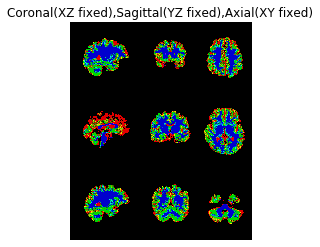

In [34]:
overlay_img = Image.fromarray(overlay).transpose(Image.ROTATE_90)

# overlay_img.set_title('Coronal(XZ fixed)    Sagittal(YZ fixed)   Axial(XY fixed)')

plt.title('Coronal(XZ fixed),Sagittal(YZ fixed),Axial(XY fixed)')

plt.axis('off') # 不显示坐标轴

plt.imshow(overlay_img)

plt.savefig('e:/overlay_image', dpi=1990)

plt.show()